In [1]:
import pandas as pd
import numpy as np
import torch

from basic_models import HestonModel, BlackScholesModel

In [2]:
# How to price a call

model = HestonModel(r=0.025, kappa=0.78, mu=0.11, eta=0.68, rho=0.044, verbose=True)
call_price = model.priceCall(strike=0.8, maturity=1, x0=1, v0=0.04)
print(f"Call option price given by the Heston model: {call_price}.")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
Call option price given by the Heston model: 0.238384857692206.


In [3]:
# How to generate call and put prices data

model = HestonModel(r=0.025, kappa=0.78, mu=0.11, eta=0.68, rho=0.044, verbose=True)
strikes = np.arange(0.8,1.21, 0.02) # Range of 21 strikes
maturities = np.arange(2/12, 14/12, 2/12) # One maturity every two months (range of 6 maturities)

prices = model.generateCallPutData(strikes, maturities, x0=1, v0=0.04)

data = np.zeros((prices.shape[0]*prices.shape[1], 4))
for i, strike in enumerate(strikes):
    for j, maturity in enumerate(maturities):
        data[i*len(maturities)+j] = strike, maturity, prices[i, j, 0], prices[i, j, 1]
data_csv = pd.DataFrame(data, columns=['strike', 'maturity', 'call', 'put'])
data_csv.to_csv('Call_Put_prices.csv')
print("Generation done and saved in the file 'Call_Put_prices.csv'.")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
Generation done and saved in the file 'Call_Put_prices.csv'.


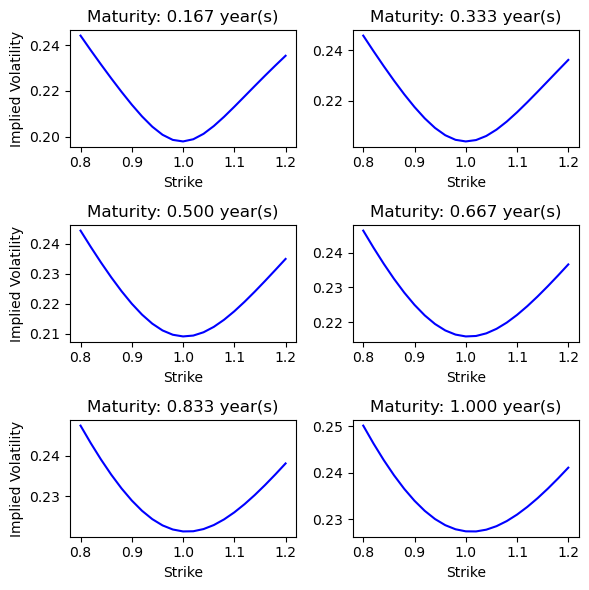

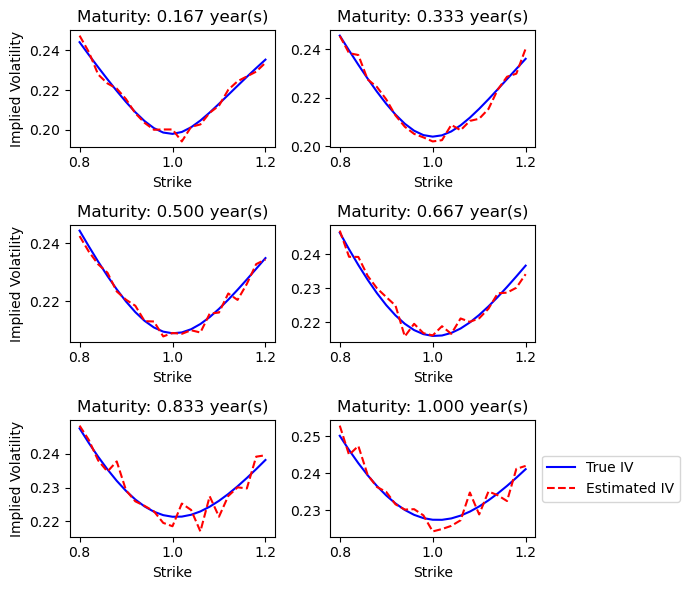

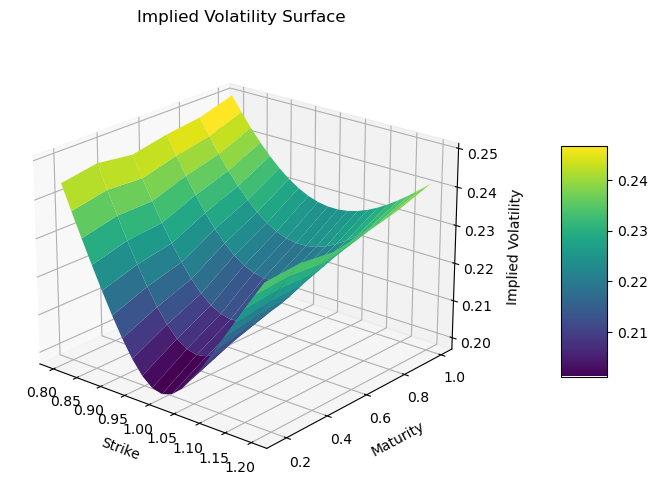

In [4]:
# How to compute the Implied Volatility Surface

BSmodel = BlackScholesModel(r=0.025, sigma=0.2) # sigma needs to be given, but it will not be used.
IV_surface = BSmodel.computeImpliedVolatilitySurface(x0=1, data=data[:, :3])
BSmodel.drawImpliedVolatilityCurves(IV_surface)

estimated_IV_surface = IV_surface.copy()
estimated_IV_surface[:, 2] += np.random.normal(loc=0, scale=0.002, size=len(IV_surface))
BSmodel.drawImpliedVolatilityCurves(IV_surface, estimated_IV_surface, fig_size=(7,6))#, plot_title="IV curves")

BSmodel.drawImpliedVolatilitySurface(IV_surface)

In [5]:
# Test whether our data are the same as the author's ones

author_data = torch.load("Call_prices_59.pt")
our_data = data_csv.sort_values(by=['maturity', 'strike'])['call'].values.reshape(6, 21)

MSE = ((our_data - author_data)**2).mean()
max_difference = np.max(np.abs(our_data - author_data))
print(f"MSE: {MSE}, max difference: {max_difference}")

MSE: 1.7748039371254873e-07, max difference: 0.0010221234007952301


In [6]:
# How to compute exotic options

model = HestonModel(r=0.025, kappa=0.78, mu=0.11, eta=0.68, rho=0.044, verbose=True)
X, V = model.diffuse(T=1, x0=1, v0=0.04, N_samples=1000000)

# Lookback Call and Put options
X_max = X.paths.max(axis=0)
X_min = X.paths.min(axis=0)
X_T = X.paths[-1]

lookback_call_price = np.exp(- 0.025) * (X_T - X_min).mean()
lookback_put_price = np.exp(- 0.025) * (X_max - X_T).mean()
print(f"Lookback call price = {lookback_call_price}, Lookback put price = {lookback_put_price}")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98
Lookback call price = 0.16413441185948804, Lookback put price = 0.1678192408771671
